In [675]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [676]:
df = pd.read_csv(
    '../datasets/C_17_dataset_190_0_upFile.csv',
    delimiter=";",
    skiprows=3,
    keep_default_na=False)

In [677]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
40,2022,10,PIEMONTE,210,CN1,A01,OPPIACEI,
44,2022,10,PIEMONTE,210,CN1,S06,OPPIACEI,
62,2022,10,PIEMONTE,301,ASL CITTA' DI TORINO,A02,OPPIACEI,
97,2022,30,LOMBARDIA,706,ASST RHODENSE,S01,OPPIACEI,
277,2022,90,TOSCANA,201,AZIENDA USL TOSCANA CENTRO,S24,OPPIACEI,
...,...,...,...,...,...,...,...,...
2773,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S05,ALTRE SOSTANZE,
2774,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S06,ALTRE SOSTANZE,
2775,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S12,ALTRE SOSTANZE,
2776,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S14,ALTRE SOSTANZE,


In [678]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [679]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti


In [680]:
df.Utenti = df.Utenti.astype(float)

<Axes: xlabel='Descrizione Regione'>

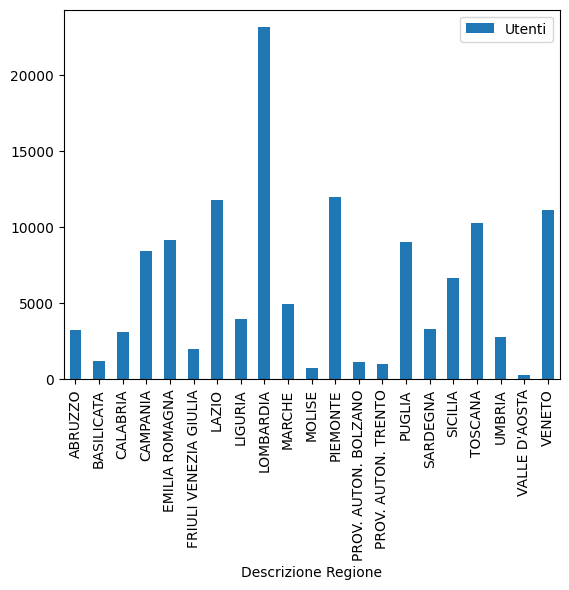

In [681]:
df[['Descrizione Regione', 'Utenti']].groupby('Descrizione Regione').sum().plot.bar()

# Edit geojson

In [682]:
regions_df = gpd.read_file('../datasets/limits_IT_regions.geojson')

In [683]:
regions_df.head()

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846..."


In [684]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.lower())

In [685]:
regions_df.loc[regions_df["reg_name"] == "valle d'aosta/vallée d'aoste", "reg_name"] = "valle d'aosta"

In [686]:
regions_df.loc[regions_df["reg_name"] == "trentino-alto adige/südtirol", "reg_name"] = "trentino-alto adige"

In [687]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.replace("-", " "))

In [688]:
regions_df['reg_name']

0                  piemonte
1             valle d'aosta
2                 lombardia
3       trentino alto adige
4                    veneto
5     friuli venezia giulia
6                   liguria
7            emilia romagna
8                   toscana
9                    umbria
10                   marche
11                    lazio
12                  abruzzo
13                   molise
14                 campania
15                   puglia
16               basilicata
17                 calabria
18                  sicilia
19                 sardegna
Name: reg_name, dtype: object

In [689]:
df['Descrizione Regione'].unique()

array(['PIEMONTE', "VALLE D'AOSTA", 'LOMBARDIA', 'PROV. AUTON. BOLZANO',
       'PROV. AUTON. TRENTO', 'VENETO', 'FRIULI VENEZIA GIULIA',
       'LIGURIA', 'EMILIA ROMAGNA', 'TOSCANA', 'UMBRIA', 'MARCHE',
       'LAZIO', 'ABRUZZO', 'MOLISE', 'CAMPANIA', 'PUGLIA', 'BASILICATA',
       'CALABRIA', 'SICILIA', 'SARDEGNA'], dtype=object)

In [690]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. BOLZANO', "Descrizione Regione"] = 'trentino-alto adige'

In [691]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. TRENTO', "Descrizione Regione"] = 'trentino-alto adige'

In [692]:
df['Descrizione Regione'] = df['Descrizione Regione'].str.lower()

In [693]:
df['Descrizione Regione'] = df['Descrizione Regione'].map(lambda x: x.replace("-", " "))

In [694]:
df = df.rename(columns={"Descrizione Regione": "reg_name"})

In [695]:
df

,Anno,Codice regione,reg_name,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
0,2022,10,piemonte,203,TO3,A12,OPPIACEI,1.0
1,2022,10,piemonte,203,TO3,B01,OPPIACEI,3.0
2,2022,10,piemonte,203,TO3,B03,OPPIACEI,40.0
3,2022,10,piemonte,203,TO3,S01,OPPIACEI,124.0
4,2022,10,piemonte,203,TO3,S02,OPPIACEI,104.0
...,...,...,...,...,...,...,...,...
2775,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S12,ALTRE SOSTANZE,NaN
2776,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S14,ALTRE SOSTANZE,NaN
2777,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S21,ALTRE SOSTANZE,NaN
2778,2022,200,sardegna,302,ASL N. 2 DELLA GALLURA,S06,ALTRE SOSTANZE,1.0


In [696]:
df = df.drop(columns=["ASL", "SERD", "Anno", "Codice ASL", "Codice regione"])

# oppiacei 

In [697]:
df_oppiacei = df.loc[df["Categoria Sostanza"] == 'OPPIACEI', ]

In [698]:
df_oppiacei = df.drop(columns=["Categoria Sostanza", ])

In [699]:
df_oppiacei_agg_serd = df_oppiacei.groupby([
    'reg_name',
]).count().reset_index()

In [700]:
df_oppiacei_agg_serd

,reg_name,Utenti
0,abruzzo,40
1,basilicata,22
2,calabria,49
3,campania,139
4,emilia romagna,216
5,friuli venezia giulia,45
6,lazio,221
7,liguria,81
8,lombardia,374
9,marche,75


In [701]:
df_oppiacei_agg_serd = df_oppiacei_agg_serd.rename(columns={"Utenti": "serd_count"})

In [702]:
df_oppiacei = df_oppiacei.groupby([
    'reg_name',
]).sum().reset_index()

In [703]:
df_oppiacei = df_oppiacei.rename(columns={"Utenti": "utenti_sum"})

In [704]:
df_oppiacei = df_oppiacei.merge(df_oppiacei_agg_serd, on="reg_name")

In [705]:
df_oppiacei["utenti_std"] = df_oppiacei["utenti_sum"] / df_oppiacei["serd_count"]

In [706]:
df_oppiacei

,reg_name,utenti_sum,serd_count,utenti_std
0,abruzzo,3241.0,40,81.025000
1,basilicata,1176.0,22,53.454545
2,calabria,3090.0,49,63.061224
3,campania,8462.0,139,60.877698
4,emilia romagna,9139.0,216,42.310185
5,friuli venezia giulia,1983.0,45,44.066667
6,lazio,11767.0,221,53.244344
7,liguria,3969.0,81,49.000000
8,lombardia,23161.0,374,61.927807
9,marche,4962.0,75,66.160000


In [707]:
gdf_oppiacei = regions_df.merge(df_oppiacei)

In [708]:
gdf_oppiacei

,reg_name,reg_istat_code_num,reg_istat_code,geometry,utenti_sum,serd_count,utenti_std
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",11971.0,302,39.639073
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",281.0,12,23.416667
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",23161.0,374,61.927807
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",2134.0,37,57.675676
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",11105.0,181,61.353591
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",1983.0,45,44.066667
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",3969.0,81,49.000000
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",9139.0,216,42.310185
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",10265.0,170,60.382353
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",2753.0,49,56.183673


<Axes: ylabel='reg_name'>

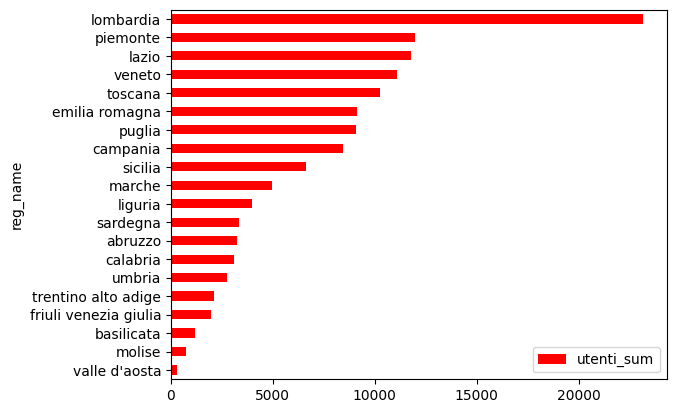

In [709]:
gdf_oppiacei[["reg_name", 'utenti_sum']].groupby("reg_name").sum().sort_values(by=['utenti_sum']).plot(
    kind="barh",
    cmap='autumn'
)

<Axes: ylabel='reg_name'>

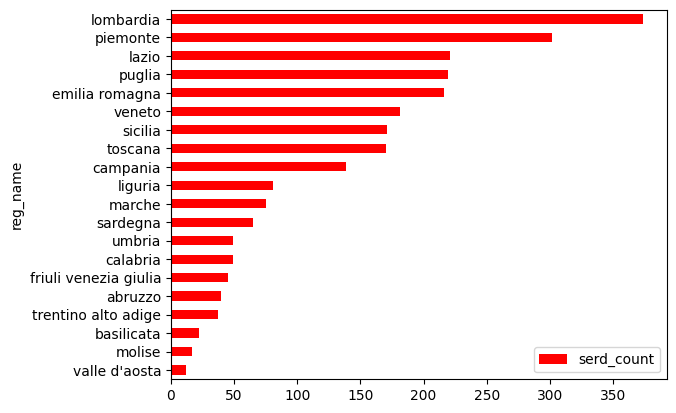

In [710]:
gdf_oppiacei[["reg_name", 'serd_count']].groupby("reg_name").sum().sort_values(by=['serd_count']).plot(
    kind="barh",
    cmap='autumn'
)

<Axes: ylabel='reg_name'>

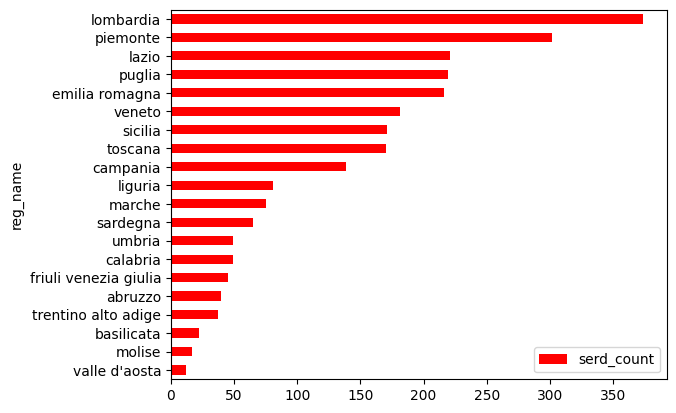

In [710]:
gdf_oppiacei[["reg_name", 'utenti_std']].groupby("reg_name").sum().sort_values(by=['serd_count']).plot(
    kind="barh",
    cmap='autumn'
)

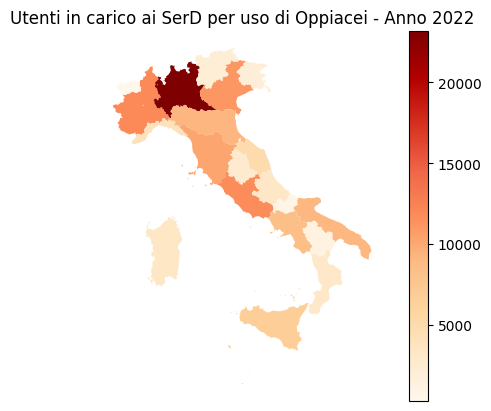

In [711]:
plot_oppiacei = gdf_oppiacei.plot(
    column="utenti_sum",
    legend=True,
    cmap='OrRd'
);
plt.title("Utenti in carico ai SerD per uso di Oppiacei - Anno 2022")
plot_oppiacei.set_axis_off()

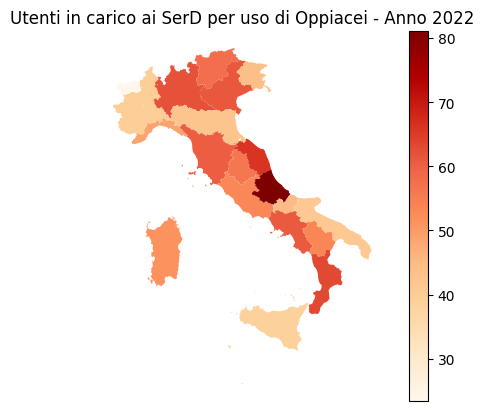

In [713]:
plot_oppiacei = gdf_oppiacei.plot(
    column="utenti_std",
    legend=True,
    cmap='OrRd'
);
plt.title("Utenti in carico ai SerD per uso di Oppiacei - Anno 2022")
plot_oppiacei.set_axis_off()

In [ ]:
plot_oppiacei = regions_df.loc[regions_df["Categoria Sostanza"] == 'COCAINA', ].plot(
    column="Utenti",
    legend=True,
    cmap='OrRd'
);
plt.title("Utenti in carico ai SerD per uso di Cocaina - Anno 2022")
plot_oppiacei.set_axis_off()